In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from matplotlib.colors import ListedColormap

In [2]:
# loading datasets
ycom = pd.read_csv('YCOM_2018_Data.csv', encoding='latin-1')
census = pd.read_csv('us-census-demographic-data/acs2015_county_data.csv')

In [3]:
# Deselct Puerto Rico from census, since Ycom data doesn't cover this state.
census = census.iloc[:3142]

In [4]:
# selecting only the county rows and reseting the index.
ycom_county = ycom.loc[ycom['GeoType'] == 'County']
ycom_county = ycom_county.reset_index(drop=True)

In [146]:
#ycom_county[['County','happening','TotalPop']]

In [6]:
# Separating the counties and states from 'GeoType' column and add those as
# separated columns to the 'ycom_county' dataframe.
county_state_sep = pd.DataFrame(ycom_county.GeoName.str.split(',').tolist())
ycom_county['State'] = county_state_sep[1]
ycom_county['County'] = county_state_sep[0]

In [7]:
# Dropping 'county' and 'Parish' words and the last whitespace
# from the counties.
ycom_county['County'] = ycom_county['County'].str.replace('County', '')
ycom_county['County'] = ycom_county['County'].str.replace('Parish', '')
ycom_county['County'] = ycom_county['County'].str.strip()

In [8]:
# test if the counties are the same and in order in two datasets.
if np.all(ycom_county['County'] == census['County']):
    print('Yaaaaay!')

Yaaaaay!


In [169]:
# getting one dataframe from the two datasets 
data2 = pd.concat(([ycom_county,census]),axis = 1)
data2.head()

,GeoType,GeoName,TotalPop,happening,happeningOppose,human,humanOppose,consensus,consensusOppose,affectweather,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,County,"Autauga County, Alabama",36466,59.476,19.778,46.971,40.041,36.184,34.858,48.943,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,County,"Baldwin County, Alabama",139946,60.062,21.933,46.129,39.811,35.712,37.552,51.123,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,County,"Barbour County, Alabama",18387,67.862,11.588,51.930,37.128,41.492,25.576,57.897,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,County,"Bibb County, Alabama",15750,58.232,20.045,45.592,41.583,34.476,34.132,49.326,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,County,"Blount County, Alabama",39472,52.956,26.374,44.090,41.153,32.142,38.182,43.864,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [150]:
# testing stats for a single combination of variables
datain = pd.concat(([ycom_county['worriedOppose'], census['Drive']]), axis = 1)

In [151]:
stats_datain = linregress(datain['worriedOppose'], datain['Drive']) 
stats_datain

LinregressResult(slope=0.58483955162064671, intercept=52.336859719026997, rvalue=0.47036081410347225, pvalue=9.6571823750892251e-173, stderr=0.019581357331979458)

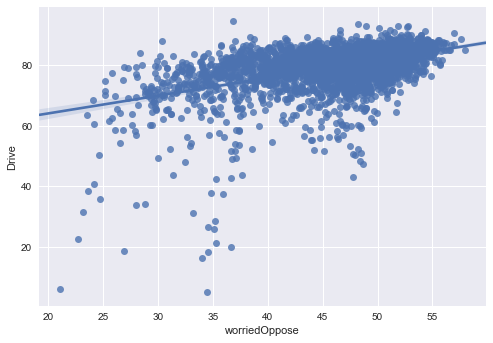

In [152]:
sns.regplot(x='worriedOppose', y = 'Drive', data=datain,fit_reg=True);
plt.show()

In [171]:
n_ycom = list(ycom_county)[3:-2]
n_census = list(census)[4:]
n_ycom

['happening',
 'happeningOppose',
 'human',
 'humanOppose',
 'consensus',
 'consensusOppose',
 'affectweather',
 'affectweatherOppose',
 'worried',
 'worriedOppose',
 'harmplants',
 'harmplantsOppose',
 'futuregen',
 'futuregenOppose',
 'devharm',
 'devharmOppose',
 'harmUS',
 'harmUSOppose',
 'personal',
 'personalOppose',
 'timing',
 'timingOppose',
 'fundrenewables',
 'fundrenewablesOppose',
 'regulate',
 'regulateOppose',
 'CO2limits',
 'CO2limitsOppose',
 'reducetax',
 'reducetaxOppose',
 'supportRPS',
 'supportRPSOppose',
 'rebates',
 'rebatesOppose',
 'drillANWR',
 'drillANWROppose',
 'drilloffshore',
 'drilloffshoreOppose',
 'teachGW',
 'teachGWOppose',
 'corporations',
 'corporationsOppose',
 'citizens',
 'citizensOppose',
 'congress',
 'congressOppose',
 'governor',
 'governorOppose',
 'localofficials',
 'localofficialsOppose',
 'prienv',
 'prienvOppose',
 'discuss',
 'discussOppose',
 'mediaweekly',
 'mediaweeklyOppose']

In [315]:
#Pearson's correlation coefficient,2-tailed p-value
stats_outputs = np.zeros((len(n_ycom),len(n_census),5))
stats_outputs_standard = np.zeros((len(n_ycom),len(n_census),5))
for x in range(len(n_ycom)):
    for y in range(len(n_census)):
        #nans when ny (census) index is 9,10,14 ie. income, incomeErr, childpoverty
        #reason is Loving Texas (not kidding), ind=2673, a county with no data for these variables
        #census.Income is same as #census[ny[9]]
        #n.b. if missing values are in census for given variable then county is ignored for that calculation
        ycom_notnull = ycom_county[n_ycom[x]][census[n_census[y]].notnull()]
        census_notnull = census[n_census[y]][census[n_census[y]].notnull()]
        
        #also doing calculations on standardized variables #standardized_column = (column - mean(column)) / std(column)
        ycom_standard = (ycom_notnull - np.mean(ycom_notnull)) / np.std(ycom_notnull)
        census_standard = (census_notnull - np.mean(census_notnull)) / np.std(census_notnull)
        
        
        stats_outputs[x,y,:] = linregress(ycom_notnull, census_notnull)
        stats_outputs_standard[x,y,:] = linregress(ycom_standard, census_standard)
        

print('size of stats array created')        
print('#ycom,#census,#stattypes')        
print(stats_outputs.shape)

size of stats array created
#ycom,#census,#stattypes
(56, 33, 5)


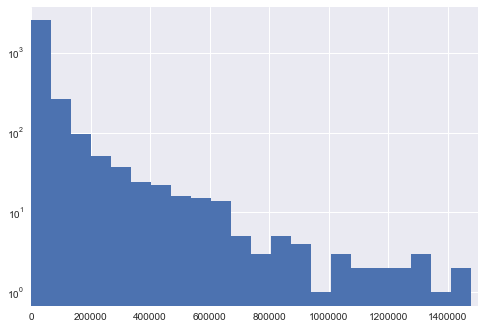

In [173]:
#what do people think about correlation/regression calculation being weighted by population in each county?
#that way a lot of small counties wouldn't skew the result?
#depends on the exact research question we want to ask
#also would have to use a function that isn't linregress as weighting isn't supported for it
ycom_county.TotalPop.hist(bins=100)
plt.xlim(0,1500000)
plt.yscale('log')
plt.show()

In [300]:
color_map = plt.cm.RdYlBu(np.linspace(0, 1.1, 20))
color_map = ListedColormap(color_map[::-1]) 

color_map_1 = plt.cm.hot(np.linspace(0, 1.1, 20))
color_map_1 = ListedColormap(color_map_1[::-1]) 

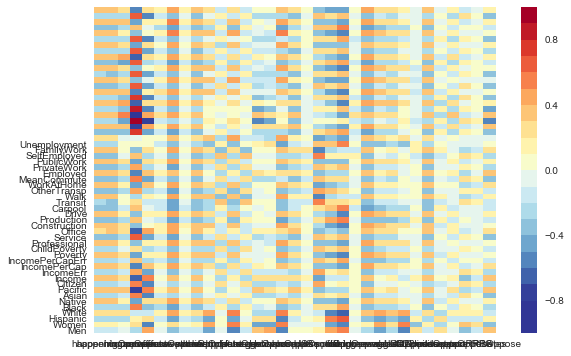

In [197]:
f, ax = plt.subplots(figsize=(9, 6))
fig= sns.heatmap(stats_outputs[:,:,2],cmap = color_map,vmin = -1 , vmax = 1, ax = ax)
ax.set_xticklabels(n_ycom)
ax.set_yticklabels(n_census)
#plt.savefig('heat_map.png', dpi=300, bbox_inches='tight')       
plt.show()

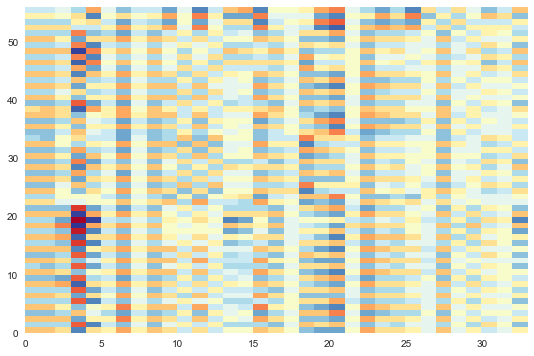

In [166]:
f, ax = plt.subplots(figsize=(9, 6))
ax.pcolor(np.ma.masked_where(np.isnan(stats_outputs[:,:,2]),stats_outputs[:,:,2]),cmap = color_map,vmin = -1 , vmax = 1)
plt.show()

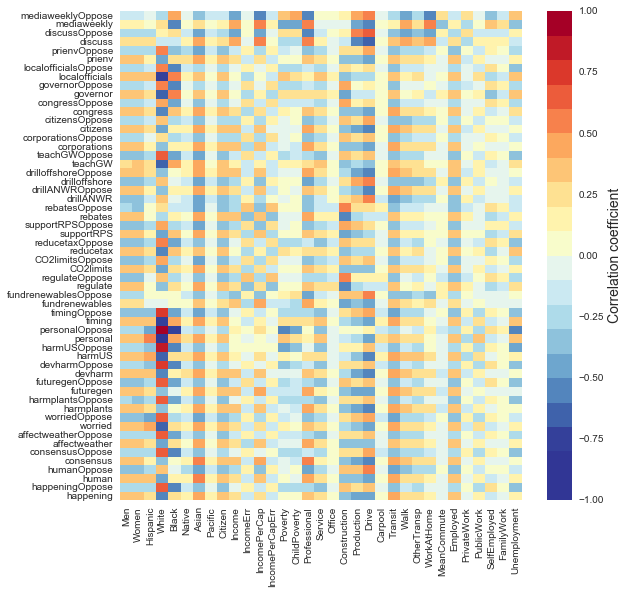

In [316]:
#correlation plot
f, ax = plt.subplots(figsize = (9, 9))
im=ax.pcolor(stats_outputs[:,:,2], cmap = color_map, vmin = -1, vmax = 1)
ax.set_xticks(np.arange(0.5, 33.5, step = 1))
ax.set_yticks(np.arange(0.5, 56.5, step = 1))
ax.set_xticklabels(n_census, rotation = 90)
ax.set_yticklabels(n_ycom)
h=f.colorbar(im, ax = ax)
h.set_label('Correlation coefficient', fontsize = 14)
plt.show()

regression of unstandardized variables so can see magnitude of effect


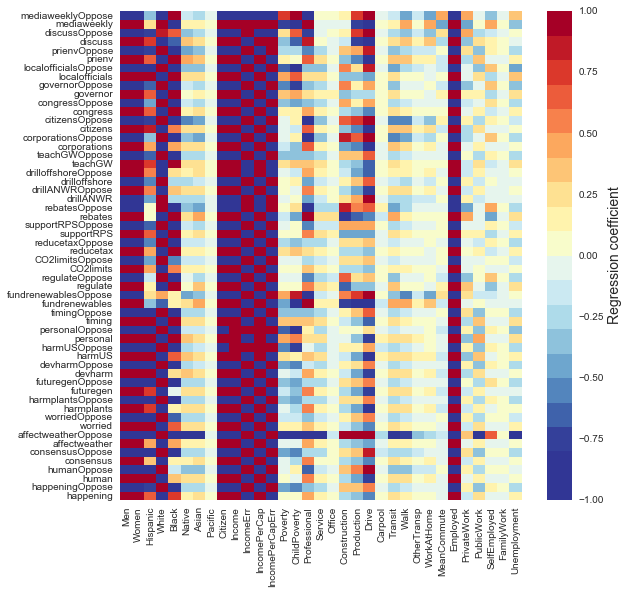

regression of standardized variables so different combinations are comparable


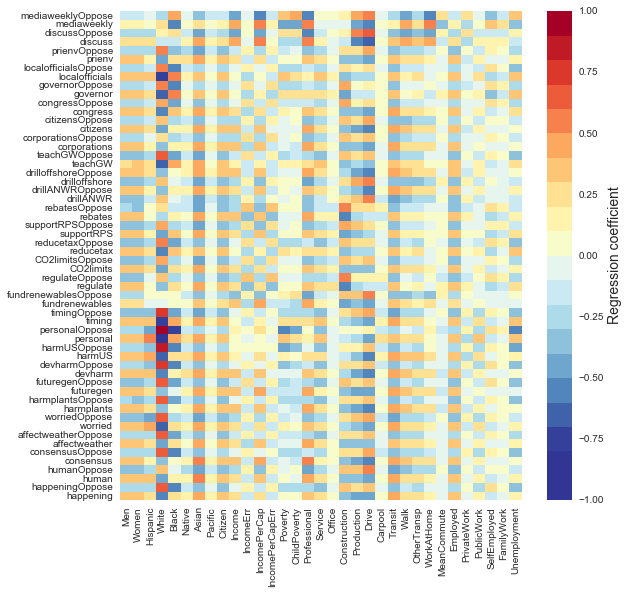

In [317]:
#regression plot
print('regression of unstandardized variables so can see magnitude of effect')
f, ax = plt.subplots(figsize = (9, 9))
im=ax.pcolor(stats_outputs[:,:,0], cmap = color_map, vmin = -1, vmax = 1)
ax.set_xticks(np.arange(0.5, 33.5, step = 1))
ax.set_yticks(np.arange(0.5, 56.5, step = 1))
ax.set_xticklabels(n_census, rotation = 90)
ax.set_yticklabels(n_ycom)
h=f.colorbar(im, ax = ax)
h.set_label('Regression coefficient', fontsize = 14)
plt.show()

print('regression of standardized variables so different combinations are comparable')
f, ax = plt.subplots(figsize = (9, 9))
im=ax.pcolor(stats_outputs_standard[:,:,0], cmap = color_map, vmin = -1, vmax = 1)
ax.set_xticks(np.arange(0.5, 33.5, step = 1))
ax.set_yticks(np.arange(0.5, 56.5, step = 1))
ax.set_xticklabels(n_census, rotation = 90)
ax.set_yticklabels(n_ycom)
h=f.colorbar(im, ax = ax)
h.set_label('Regression coefficient (standardized)', fontsize = 14)
plt.show()

this looks weird. not sure why but i dont trust it.
maybe should look into these p values some more


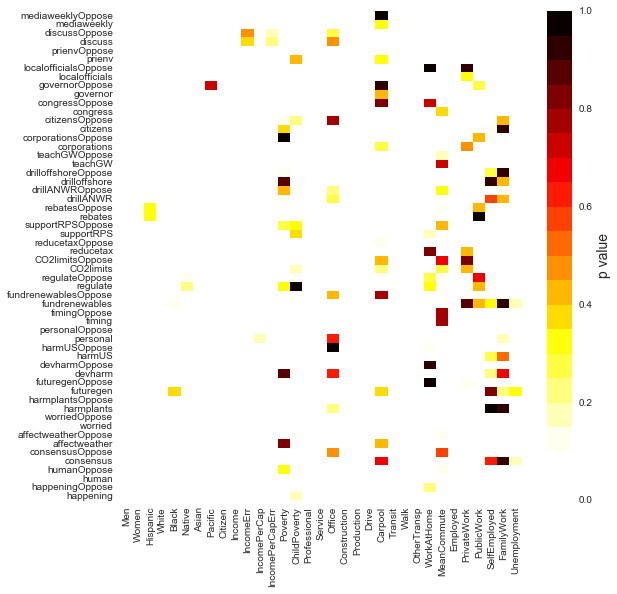

In [318]:
#significance plot
#so p value is for hypothesis that slope is 0. refers more to regression than correlation right?
print('this looks weird. not sure why but i dont trust it.')
print('maybe should look into these p values some more')
f, ax = plt.subplots(figsize = (9, 9))
im=ax.pcolor(stats_outputs[:,:,3], cmap = color_map_1, vmin = 0, vmax = 1)
ax.set_xticks(np.arange(0.5, 33.5, step = 1))
ax.set_yticks(np.arange(0.5, 56.5, step = 1))
ax.set_xticklabels(n_census, rotation = 90)
ax.set_yticklabels(n_ycom)
h=f.colorbar(im, ax = ax)
h.set_label('p value', fontsize = 14)
plt.show()

In [176]:
#sns.regplot(x='happening', y = 'Drive', data=datain,fit_reg=True);